# Capstone project : Price of tomato and its influencers.

A warm season crop, sensitive to frost. It is usually cultivated in sub-tropical and mild cold climatic regions. It thrives well in temperature 100C to 300C with optimum range of temperature is 21-240C. The mean temperature below 160C and above 270C are not desirable. Thus temperature affects the germination, crop standing and ultimately affects yield, quality and price.

Quality

In heavy soils if drainage is not provided, higher moisture content and water stagnation causes ill effects on tomato that is fruit quality deteriorate due to spots on fruits, incidence of pest and diseases. The soil humidity is bad to the production. 

Full ripe tomatoes are stored at a temperature of 55°F for up to several days. Temperatures cooler than this will cause chilling injury, producing poor colors and off flavors.
• 	Quality

Due to improper storage, there is a loss in fresh weight of about 10-15%. This causes them to appear shriveled and stale, thus considerably lowering their market value and consumer acceptability. Proper storage facilities are important in stabilizing the supplies by carrying over the produce from periods of high production to periods of low production.
• 	Price

In the absence of storage facilities, the producer would be forced to put his products on the market soon after harvest, immaterial of the demand. Thus resulting in a glut and market stagnation with consequent loss to the producer. This would benefit the consumer since the prices would drop. But, the farmer could price the very high when the demand is greater than the supply.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
data_2017_2015 = pd.read_excel("data/tomato_price_2017_2015.xls")
data_2019_2018 = pd.read_excel("data/tomato_price_2019_2018.xls")
del data_2017_2015['Week ending']
del data_2019_2018['Week ending']

# I reemplace missing values with the column mean
data_2017_2015 = data_2017_2015.fillna(value=round(data_2017_2015.mean(), 2))
data_2019_2018 = data_2019_2018.fillna(value=round(data_2019_2018.mean(),2))

data_2017_2015.shape[1] + data_2019_2018.shape[1]  


263

In [3]:
# Like date are the columns names, and I need do date like index of dataframe, 
#I applied Transpose and build a DataFrame

data_2017_2015= data_2017_2015.T
index_2017_2015 = pd.DatetimeIndex(data_2017_2015.index[1:], name='date')

data_2017_2015_tomato = pd.DataFrame(np.array(data_2017_2015[1:][2]), \
    columns=['tomato_price'], \
    index=index_2017_2015 )

data_2017_2015_tomato.sort_index(inplace=True)

# The same steps to data_2019_2018
data_2019_2018 = data_2019_2018.T
index_2019_2018 = pd.DatetimeIndex(data_2019_2018.index[1:], name='date')
data_2019_2018_tomato = pd.DataFrame(np.array(data_2019_2018[1:][2]), \
    columns=['tomato_price'], \
    index=index_2019_2018 )

data_2019_2018_tomato.sort_index(inplace=True)

#I concat both dataframes to have all data in one
data_tomato_price =  pd.concat([data_2017_2015_tomato, data_2019_2018_tomato])

# I save data like csv to use with Prophet in another jupyter notebook
data_tomato_price.to_csv('data_tomato_price.csv')
data_tomato_price

,tomato_price
date,
2015-01-05,0.99
2015-01-16,0.34
2015-01-23,0.33
2015-01-30,0.33
2015-02-01,0.62
...,...
2019-12-04,1.31
2019-12-07,0.95
2019-12-13,0.43


In [4]:
# The same steps to lettuce price
data_2017_2015_lettuce = pd.DataFrame(np.array(data_2017_2015[1:][0]), \
    columns=['lettuce_price'], \
    index=index_2017_2015 )

data_2017_2015_lettuce.sort_index(inplace=True)
data_2019_2018_lettuce = pd.DataFrame(np.array(data_2019_2018[1:][0]), \
    columns=['lettuce_price'], \
    index=index_2019_2018 )

data_2019_2018_lettuce.sort_index(inplace=True)
#I concat both dataframes to have all data in one
data_lettuce_price =  pd.concat([data_2017_2015_lettuce, data_2019_2018_lettuce])

# I save data like csv to use with Prophet in another jupyter notebook
data_lettuce_price.to_csv('data_lettuce_price.csv')
data_lettuce_price 

,lettuce_price
date,
2015-01-05,0.32
2015-01-16,0.34
2015-01-23,0.33
2015-01-30,0.33
2015-02-01,0.33
...,...
2019-12-04,0.33
2019-12-07,0.35
2019-12-13,0.43


In [5]:
# The same steps to onion price
data_2017_2015_onion = pd.DataFrame(np.array(data_2017_2015[1:][1]), \
    columns=['onion_price'], \
    index=index_2017_2015 )

data_2017_2015_onion.sort_index(inplace=True)
data_2019_2018_onion = pd.DataFrame(np.array(data_2019_2018[1:][1]), \
    columns=['onion_price'], \
    index=index_2019_2018 )

data_2019_2018_onion.sort_index(inplace=True)
#I concat both dataframes to have all data in one
data_onion_price =  pd.concat([data_2017_2015_onion, data_2019_2018_onion])

# I save data like csv to use with Prophet in another jupyter notebook
data_onion_price.to_csv('data_onion_price.csv')
data_onion_price 

,onion_price
date,
2015-01-05,0.25
2015-01-16,0.34
2015-01-23,0.33
2015-01-30,0.33
2015-02-01,0.48
...,...
2019-12-04,0.28
2019-12-07,0.25
2019-12-13,0.43


In [6]:
# I Generate descriptive statistics to see data
data_tomato_price.describe(include='all')
# I get the number of missing values
sum(data_tomato_price.apply(pd.isna).sum())

1

In [7]:
# I get monthly data to work with monthly whether, I need to change type data to float to use resample
data_tomato_price = data_tomato_price.astype('float')
monthly_tomato_price = data_tomato_price.resample('M').mean()
monthly_tomato_price.shape

(60, 1)

/Users/pola/miniconda3/envs/ads04/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


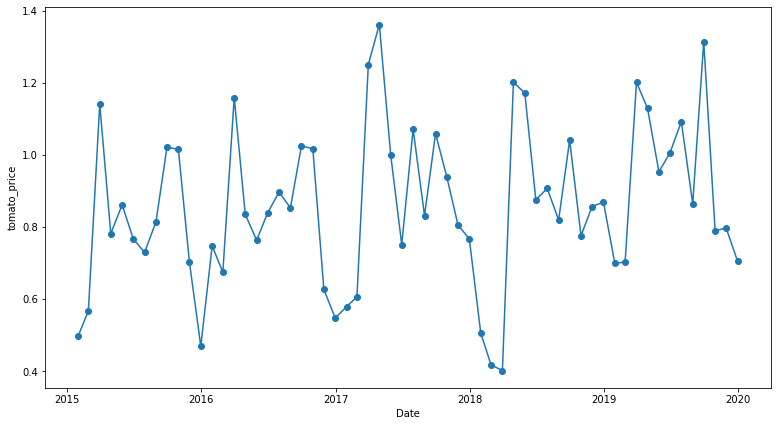

In [8]:
#I chart to explore montly tomato price

plt.figure(figsize=(13, 7))
plt.plot(monthly_tomato_price.index, monthly_tomato_price["tomato_price"], "-o")
plt.xlabel('Date')
plt.ylabel('tomato_price')
plt.show()

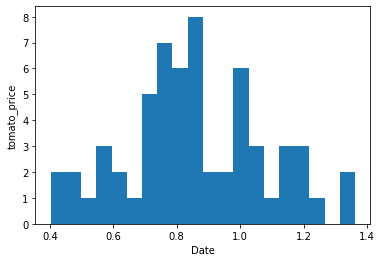

In [9]:
# Histogram to explore montly tomato price
plt.hist((monthly_tomato_price['tomato_price']), bins=20)
plt.xlabel('Date')
plt.ylabel('tomato_price')
plt.show()


In [10]:
# I read and parse weather data of BOGNOR REGIS, West Sussex where are tomatoes production
weather = pd.read_csv("data/temperatures_UK.csv", sep=';', \
    parse_dates=['day'], \
    index_col='day')
weather.sort_index(inplace=True)


In [11]:
weather.apply(pd.isna).sum()

temperature_max          0
temperature_min          0
humidity                 0
precip_intensity        22
precip_intensity_max    22
pressure                22
visibility               0
wind_speed               0
dtype: int64

In [12]:
weather = weather.fillna(value=weather.mean())

In [13]:
monthly_whether = weather.resample('M').mean() 
monthly_whether.shape

(60, 8)

/Users/pola/miniconda3/envs/ads04/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


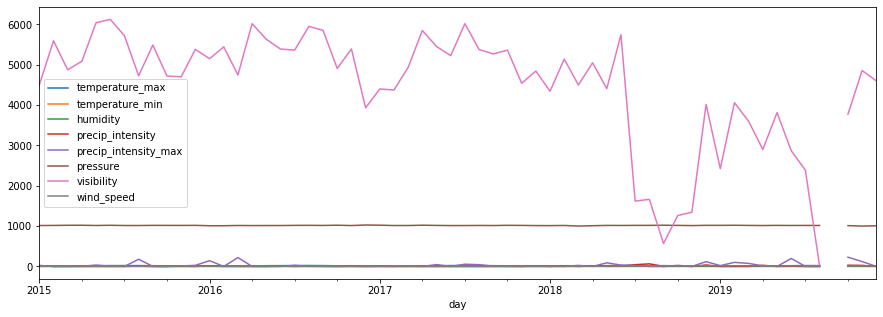

In [14]:
#I chart to explore montly whether
monthly_whether.plot(figsize=(15, 5))

In [15]:
# I build a DataFrame with all data to see the charts
all_data = monthly_whether.copy()
tomato_price = list(monthly_tomato_price['tomato_price'])
all_data['tomato_price'] = tomato_price
all_data.shape

(60, 9)

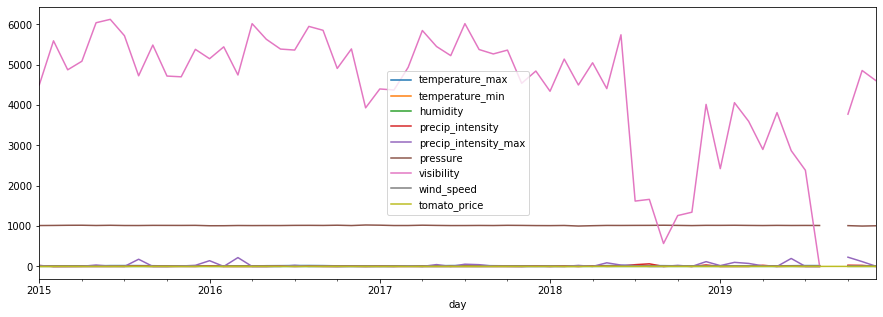

In [16]:
all_data.plot(figsize=(15, 5))

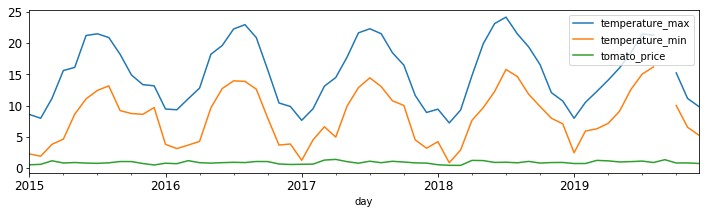

In [17]:
all_data.plot(y=['temperature_max', 'temperature_min', 'tomato_price'], figsize=(12, 3), fontsize=12)

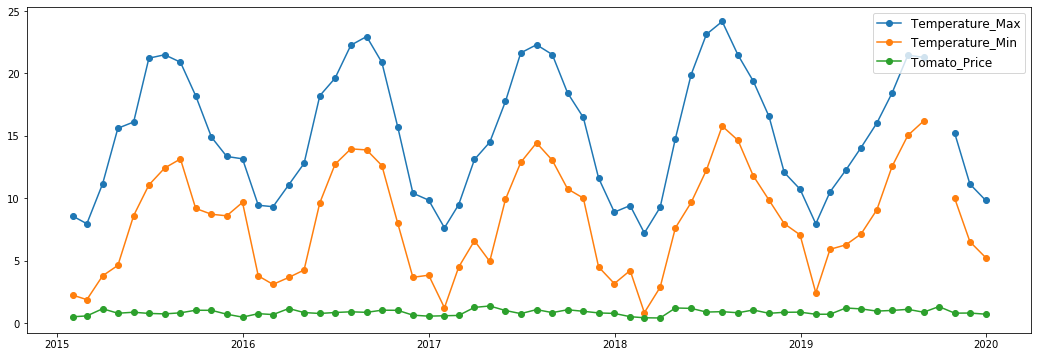

In [18]:
plt.figure(figsize=(18, 6))
plt.plot(all_data.temperature_max, 
         '-o', label='Temperature_Max')
plt.plot(all_data.temperature_min, 
         '-o', label='Temperature_Min')
plt.plot(all_data.tomato_price, 
         '-o', label='Tomato_Price')
plt.legend(fontsize=12)

In [19]:
# I add oil prices in all_data DataFrame
oil_prices = pd.read_csv("data/oil_prices.csv", sep=';', \
    parse_dates=['Date'], \
    index_col='Date')
oil_prices.sort_index(inplace=True)


In [20]:
monthly_oil_prices = oil_prices.resample('M').mean()
monthly_oil_prices.shape

(60, 1)

In [25]:
all_data['oil_price'] = list(monthly_oil_prices['Price'])
#I add lettuce and onion in all_data dataset before to save
data_lettuce_price = data_lettuce_price.astype('float')
data_onion_price = data_onion_price.astype('float')
monthly_lettuce_price = data_lettuce_price.resample('M').mean()
monthly_onion_price = data_onion_price.resample('M').mean()
all_data['lettuce_price'] = list(monthly_lettuce_price['lettuce_price'])
all_data['onion_price'] = list(monthly_onion_price['onion_price'])
# I save all_data DataFrame to use them in Random Forest model
all_data.to_csv('all_data.csv')
all_data.head()

,temperature_max,temperature_min,humidity,precip_intensity,precip_intensity_max,pressure,visibility,wind_speed,tomato_price,oil_price,lettuce_price,onion_price
day,,,,,,,,,,,,
2015-01-31 00:00:00+00:00,8.573571,2.237857,0.866429,22.079243,24.485486,1014.221429,4503.658571,5.548571,0.4975,47.759500,0.330,0.3125
2015-02-28 00:00:00+00:00,7.955000,1.872143,0.842143,0.050907,0.226479,1016.628571,5594.000000,4.152857,0.5680,58.095500,0.326,0.3400
2015-03-31 00:00:00+00:00,11.156250,3.781250,0.791875,0.011969,0.152994,1020.506250,4875.121250,4.885000,1.1420,55.885455,0.318,0.6760
2015-04-30 00:00:00+00:00,15.607333,4.617333,0.766000,0.003860,3.970053,1021.640000,5087.544000,4.008667,0.7825,59.524286,0.310,0.2300
2015-05-31 00:00:00+00:00,16.108750,8.606250,0.780625,0.053781,35.143356,1015.562500,6042.000000,4.691250,0.8625,64.075000,0.300,0.2350


In [ ]:
all_data.plot(y=['temperature_max', 'temperature_min', 'tomato_price', 'oil_price'], figsize=(12, 3), fontsize=12)

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(all_data.temperature_max, 
         '-o', label='Temperature_Max')
plt.plot(all_data.temperature_min, 
         '-o', label='Temperature_Min')
plt.plot(all_data.tomato_price, 
         '-o', label='Tomato_Price')
plt.plot(all_data.oil_price, 
         '-o', label='Oil_Price')
plt.legend(fontsize=22)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#mean
def rolling_avg_plot(window_size):
    plt.plot(all_data.tomato_price, 
             '-o', label='Tomato_Price')
    rolling = all_data.tomato_price.rolling(window=window_size).mean()
    plt.plot(rolling, label='trend')
    plt.legend();
    plt.show()

interact(rolling_avg_plot, window_size=(0, 10));

In [ ]:
#sum
plt.figure(figsize=(8, 6))
plt.plot(all_data.tomato_price,
         '-o', label='Tomato_Price')
rolling_mean = all_data.tomato_price.rolling(window=4).sum()
plt.plot(rolling_mean, label='trend')
plt.legend(fontsize=12);

In [ ]:
#diff
plt.figure(figsize=(8, 6))
plt.plot(all_data.tomato_price, '-o', 
         label="original ts")
plt.plot(all_data.tomato_price.diff(4), '-o', 
         label="differenced ts (lag=1)")
plt.legend(fontsize=12)

# Autocorrelation

In [ ]:
lags = range(1, 16)
autocorrs = [all_data.tomato_price.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(8, 6))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

It's quite clear from this plot that the time series is self-similar to itself with a lag of 6 and consistently so (so also with a lag of 8, 12, etc)